

#  Summary

##  1. Data Preparation & Feature Engineering

### Data Cleaning & Preparation

* Date columns in the `ord` DataFrame (`order_date`, `ship_date`, `delivery_date`) were successfully converted to datetime format.
* Null values in `ship_date` and `delivery_date` were identified and handled appropriately.
* Missing values in the `supp` DataFrame were addressed:

  * 1 missing `city` value was imputed using the mode (`Phoenix, AZ`).
  * 3 missing `supplier_rating` values were imputed using the mean.
* All five datasets (`ord`, `cust`, `emp`, `prd`, `supp`) were successfully merged into a single DataFrame (`df_merged`) containing:

  * **192,921 records**
  * **54 columns**

### Feature Engineering

* New derived metrics were created:

  * **Profit** = `total_amount - (quantity × unit_cost)`
  * **Order Lead Time** = days between `delivery_date` and `order_date`
* **Shipping Time (days)** was calculated as the difference between `ship_date` and `order_date`.

---

## 3. Business & Performance Insights

###  Sales Performance

* **Sales with Loss:** $-0.51M
* **Sales with Profit:** $357.17M
* **Overall Profit:** **$356.66M**

###  Top Customer Performance

* **Home Depot** is the highest revenue-generating customer with **$30.74M** in sales.
* **Verizon Communications** leads in order volume with **1.69K units sold**.

###  Geographic Sales Performance

* **New York** is the top-performing state with sales exceeding **$205M**.
* **Ohio** and **Michigan** are the lowest-performing states and require immediate strategic intervention.

###  Employee Performance

* Overall employee performance is strong.
* **Jeremy** sold lower quantities but achieved high sales value, indicating a focus on high-value transactions.

###  Supplier Performance

* **Suppliers 6 and 8** are underperforming in terms of sales and require further evaluation.

###  Product Performance

* **AutoCAD Business** is the highest revenue-generating product, exceeding **$41M** in sales.
* **LG UltraWide 34WN80C** is the most frequently sold product by quantity, with over **13.9K units sold**.

###  Regional Performance

* Domestic market performance is strong.
* International market performance remains relatively weak and presents growth opportunities.

###  Industry Performance

* **Telecommunications** and **Healthcare** are the strongest revenue-driving industries.
* **Healthcare** leads with **$241M** in revenue.
* **Manufacturing** industry performance shows potential for improvement.

---

## 3. Order Fulfillment & Logistics

* Order fulfillment efficiency is high:

  * **Cancelled Orders:** 3%
  * **Return Rate:** 2%
* Time-based performance metrics:

  * **Average Order Processing Time:** 3.00 days
  * **Average Delivery Time:** 5.81 days
  * **Average Order Fulfillment Time:** 8.82 days

---

## 4. Impact of Discounts

* Revenue generally increased with the application of **moderate discounts**.

---

## 5. Correlation Analysis

* A **very strong positive correlation (0.96)** exists between **Total Amount** and **Discount**, indicating that higher-value transactions tend to receive higher discounts.
* A **strong positive correlation (0.86)** exists between **Total Amount** and **Profit**, suggesting that higher transaction values generally result in greater profitability.

---



# Exploratory Data Analysis Tech Solutions Corporation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')

In [2]:
cust=pd.read_csv('TechCorpSolutionsData/gold_dim_customers.csv')
print(f'Loaded Customers data successfully : {len(cust)} rows')
emp=pd.read_csv('TechCorpSolutionsData/gold_dim_employees.csv')
print(f'Loaded Employees data successfully: {len(emp)} rows')
prd=pd.read_csv('TechCorpSolutionsData/gold_dim_products.csv')
print(f'Loaded Products data successfully: {len(prd)} rows')
supp=pd.read_csv('TechCorpSolutionsData/gold_dim_suppliers.csv')
print(f'Loaded Suppliers data successfully: {len(supp)} rows')
odr=pd.read_csv('TechCorpSolutionsData/gold_fact_orders.csv')
print(f'Loaded Orders data successfully: {len(odr)} rows')


Loaded Customers data successfully : 8000 rows
Loaded Employees data successfully: 150 rows
Loaded Products data successfully: 245 rows
Loaded Suppliers data successfully: 33 rows
Loaded Orders data successfully: 192921 rows


In [3]:
## Getting First Glance At Data
cust.head()

,customer_id,company_name,industry,segment,region,state,credit_limit,payment_terms,account_manager,email,acquisition_date,status
0,CUST0000001,Mastercard Inc,Energy,Enterprise,Southwest,Georgia (GA),4798665,Net 45,Allison Hill,donaldgarcia@mastercardinccorporate.com,29-11-2021 00:00,Active
1,CUST0000002,Tesla Inc,Telecommunications,Enterprise,West,California (CA),3221518,Net 45,Rhonda Smith,helenpeterson@teslainccorporate.com,13-12-2023 00:00,Inactive
2,CUST0000003,Netflix Inc,Energy,Enterprise,Northeast,Georgia (GA),2536271,Net 60,Valerie Gray,maria95@netflixinccorporate.com,04-11-2022 00:00,Active
3,CUST0000004,Cisco Systems,Healthcare,Enterprise,Southeast,Florida (FL),3026072,Net 45,Carla Kelly,jacqueline19@ciscosystemscorporate.com,20-08-2022 00:00,Active
4,CUST0000005,Meta Platforms,Healthcare,Enterprise,Southwest,Florida (FL),4032462,Net 45,Thomas Bradley,jason76@metaplatformscorporate.com,07-01-2025 00:00,Active


In [4]:
cust_nulls=cust.isnull().sum()
print(f'{cust_nulls.values.sum()} null values found in customers data')
cust_nulls

0 null values found in customers data


customer_id         0
company_name        0
industry            0
segment             0
region              0
state               0
credit_limit        0
payment_terms       0
account_manager     0
email               0
acquisition_date    0
status              0
dtype: int64

In [5]:
cust.info()
## acquisition_date is in object format . Fix Needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       8000 non-null   object
 1   company_name      8000 non-null   object
 2   industry          8000 non-null   object
 3   segment           8000 non-null   object
 4   region            8000 non-null   object
 5   state             8000 non-null   object
 6   credit_limit      8000 non-null   int64 
 7   payment_terms     8000 non-null   object
 8   account_manager   8000 non-null   object
 9   email             8000 non-null   object
 10  acquisition_date  8000 non-null   object
 11  status            8000 non-null   object
dtypes: int64(1), object(11)
memory usage: 750.1+ KB


In [6]:
cust['acquisition_date'] = pd.to_datetime(cust['acquisition_date'], dayfirst=True, errors='coerce')
print(f'{cust.acquisition_date.dtype} is the data type of acquisition_date after conversion')

datetime64[ns] is the data type of acquisition_date after conversion


In [7]:
## Checking employee data
emp.head()

,employee_id,employee_name,email,department,title,hire_date,manager_id,office_location,employment_status
0,EMP00001,Stephen Campbell,stephen.campbell@techsolutions-corp.com,Finance,CFO,07-06-2022 00:00,No Manager,Atlanta,Active
1,EMP00002,Lisa Fitzpatrick,lisa.fitzpatrick@techsolutions-corp.com,Finance,Financial Analyst,04-08-2021 00:00,No Manager,New York,Active
2,EMP00003,Gerald Hayes,gerald.hayes@techsolutions-corp.com,Operations,COO,04-06-2019 00:00,No Manager,New York,Active
3,EMP00004,Laura Fritz,laura.fritz@techsolutions-corp.com,Finance,Finance Manager,27-01-2018 00:00,No Manager,Chicago,Active
4,EMP00005,Erica Fry,erica.fry@techsolutions-corp.com,Account Management,Customer Success Manager,28-11-2025 00:00,No Manager,Boston,Active


In [8]:
## Checking nulls in employees data
emp_nulls=emp.isnull().sum()
print(f'{emp_nulls.sum()} null values found in the employee_data')
emp_nulls

0 null values found in the employee_data


employee_id          0
employee_name        0
email                0
department           0
title                0
hire_date            0
manager_id           0
office_location      0
employment_status    0
dtype: int64

In [9]:
emp.info()
## Hire date is in object format. Fix Needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   employee_id        150 non-null    object
 1   employee_name      150 non-null    object
 2   email              150 non-null    object
 3   department         150 non-null    object
 4   title              150 non-null    object
 5   hire_date          150 non-null    object
 6   manager_id         150 non-null    object
 7   office_location    150 non-null    object
 8   employment_status  150 non-null    object
dtypes: object(9)
memory usage: 10.7+ KB


In [10]:
## Fixing datatype
emp['hire_date']=pd.to_datetime(emp['hire_date'],dayfirst=True)
print(f'{emp.hire_date.dtype} is the datatype of hire_date after conversion')

datetime64[ns] is the datatype of hire_date after conversion


In [11]:
### Checking product data
prd.head()

,product_id,sku,upc,product_name,category,brand,unit_cost,unit_price,supplier_id,stock_status,warranty
0,1,LAP-000001,4.468100e+11,Microsoft Surface 840 G9,Laptops,Microsoft,868.38,1008.79,SUP00004,In Stock,12
1,10,LAP-000010,8.754640e+11,Dell Latitude X1 Carbon,Laptops,Dell,1536.79,1847.82,SUP00029,In Stock,60
2,100,OFF-000100,9.666810e+11,Haworth Zody Remastered,Office_Chairs,Haworth,470.14,603.17,SUP00010,In Stock,24
3,101,OFF-000101,9.165320e+11,Haworth Zody V2,Office_Chairs,Haworth,522.88,750.56,SUP00012,In Stock,12
4,102,OFF-000102,1.498870e+11,HON Ignition 2.0,Office_Chairs,HON,1017.97,1300.22,SUP00012,In Stock,36


In [12]:
## CHecking nulls in products data
prd_nulls=prd.isnull().sum()
print(f'{prd_nulls.sum()} null values found in the product data')
prd_nulls

0 null values found in the product data


product_id      0
sku             0
upc             0
product_name    0
category        0
brand           0
unit_cost       0
unit_price      0
supplier_id     0
stock_status    0
warranty        0
dtype: int64

In [13]:
prd.info()
## Product data is clean requires no transformation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    245 non-null    int64  
 1   sku           245 non-null    object 
 2   upc           245 non-null    float64
 3   product_name  245 non-null    object 
 4   category      245 non-null    object 
 5   brand         245 non-null    object 
 6   unit_cost     245 non-null    float64
 7   unit_price    245 non-null    float64
 8   supplier_id   245 non-null    object 
 9   stock_status  245 non-null    object 
 10  warranty      245 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 21.2+ KB


In [14]:
## Checking suppliers data
supp.head()

,supplier_id,category,city,country,lead_time_days,payment_terms,supplier_rating,active_status
0,SUP00001,Technology,"San Jose, CA",USA,41,Net 45,3.7,Active
1,SUP00002,Technology,"Phoenix, AZ",USA,4,Net 30,NaN,Active
2,SUP00003,Technology,"Phoenix, AZ",USA,12,Net 45,4.6,Active
3,SUP00004,Technology,"Charlotte, NC",USA,12,Net 30,3.7,Active
4,SUP00005,Technology,"Dallas, TX",USA,5,Net 60,4.1,Active


In [15]:
supp_nulls=supp.isnull().sum()
print(f'{supp_nulls.sum()} null values found in the suppliers data')
supp_nulls

4 null values found in the suppliers data


supplier_id        0
category           0
city               1
country            0
lead_time_days     0
payment_terms      0
supplier_rating    3
active_status      0
dtype: int64

In [16]:
print("Values in 'city' column before handling nulls:")
supp_city=supp['city'].value_counts()
print('-'*45)
print(f'{'city':<15} : {'count'}')
print('-'*45)
for city, count in supp_city.items():
    print(f'{city:<15} : {count}')

Values in 'city' column before handling nulls:
---------------------------------------------
city            : count
---------------------------------------------
Phoenix, AZ     : 7
Charlotte, NC   : 7
Chicago, IL     : 7
Dallas, TX      : 6
Atlanta, GA     : 2
San Jose, CA    : 1
Seattle, WA     : 1
Tokyo, Japan    : 1


In [17]:
## Filling Null city with the mode
mode_city = supp['city'].mode()[0]
supp['city'].fillna(mode_city, inplace=True)

print(f"{supp['city'].isnull().sum()} Null values found in 'city' column after imputation")

0 Null values found in 'city' column after imputation


In [18]:
print("\nUnique values in 'supplier_rating' column before handling nulls:")
supp_rating_count=supp['supplier_rating'].value_counts()
print('-'*30)
print(f'{'city':<15} : {'count'}')
print('-'*30)
for rating, count in supp_rating_count.items():
    print(f'{rating:<15} : {count}')


Unique values in 'supplier_rating' column before handling nulls:
------------------------------
city            : count
------------------------------
3.7             : 5
4.6             : 5
4.1             : 5
4.2             : 4
4.3             : 2
4.9             : 2
3.5             : 1
4.0             : 1
4.8             : 1
3.8             : 1
3.6             : 1
3.9             : 1
4.5             : 1


In [19]:
mean_supplier_rating = supp['supplier_rating'].mean()
supp['supplier_rating'] = supp['supplier_rating'].fillna(mean_supplier_rating)

print(f"{supp.isnull().sum().sum()} Null values found in supplier data after final check:")

0 Null values found in supplier data after final check:


In [20]:
supp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   supplier_id      33 non-null     object 
 1   category         33 non-null     object 
 2   city             33 non-null     object 
 3   country          33 non-null     object 
 4   lead_time_days   33 non-null     int64  
 5   payment_terms    33 non-null     object 
 6   supplier_rating  33 non-null     float64
 7   active_status    33 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.2+ KB


In [21]:
odr.info()
## order_date, ship_date and delivery_date are in object form. Fix Needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192921 entries, 0 to 192920
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             192921 non-null  object 
 1   order_date           192921 non-null  object 
 2   customer_id          192921 non-null  object 
 3   product_id           192921 non-null  int64  
 4   supplier_id          192921 non-null  object 
 5   employee_id          192921 non-null  object 
 6   quantity             192921 non-null  int64  
 7   unit_price           192921 non-null  float64
 8   subtotal             192921 non-null  float64
 9   discount_percentage  192921 non-null  float64
 10  discount             192921 non-null  float64
 11  tax_amount           192921 non-null  float64
 12  total_amount         192921 non-null  float64
 13  order_status         192921 non-null  object 
 14  payment_method       192921 non-null  object 
 15  ship_date        

In [22]:
## Fixing datatypes
odr['order_date'] = pd.to_datetime(odr['order_date'], dayfirst=True, errors='coerce')
print(f'{odr.order_date.dtype} is the datatype of order_date after conversion\n')
odr['ship_date'] = pd.to_datetime(odr['ship_date'], dayfirst=True, errors='coerce')
print(f'{odr.ship_date.dtype} is the datatype of ship_date after conversion\n')
odr['delivery_date'] = pd.to_datetime(odr['delivery_date'], dayfirst=True, errors='coerce')
print(f'{odr.delivery_date.dtype} is the datatype of delivery_date after conversion\n')

datetime64[ns] is the datatype of order_date after conversion

datetime64[ns] is the datatype of ship_date after conversion

datetime64[ns] is the datatype of delivery_date after conversion



## Merging datasets
Merging the `ord` (orders) DataFrame with `cust` (customers) using left join

In [23]:
df_merged = pd.merge(odr, cust, on='customer_id', how='left')
print("Merged 'ord' with 'cust'.")

initial_columns = len(df_merged.columns)
columns_to_drop = [col for col in df_merged.columns if col.endswith('_y')]
df_merged.drop(columns=columns_to_drop, inplace=True)
dropped_columns_count = initial_columns - len(df_merged.columns)

print(f"Dropped {dropped_columns_count} duplicate columns.")

Merged 'ord' with 'cust'.
Dropped 0 duplicate columns.


Merging `df_merged` DataFrame with the `emp` DataFrame using `employee_id` as the common key, using left join


In [24]:
df_merged = pd.merge(df_merged, emp, on='employee_id', how='left')
print("Merged 'df_merged' with 'emp'.")
initial_columns = len(df_merged.columns)
columns_to_drop = [col for col in df_merged.columns if col.endswith('_y')]
df_merged.drop(columns=columns_to_drop, inplace=True)
dropped_columns_count = initial_columns - len(df_merged.columns)

print(f"Dropped {dropped_columns_count} duplicate columns.")

Merged 'df_merged' with 'emp'.
Dropped 1 duplicate columns.


Merging `df_merged` DataFrame with the `prd` DataFrame using `product_id` as the common key,  using left join


In [25]:
df_merged = pd.merge(df_merged, prd, on='product_id', how='left')
print("Merged 'df_merged' with 'prd'.")
initial_columns = len(df_merged.columns)
columns_to_drop = [col for col in df_merged.columns if col.endswith('_y')]
df_merged.drop(columns=columns_to_drop, inplace=True)
dropped_columns_count = initial_columns - len(df_merged.columns)

print(f"Dropped {dropped_columns_count} duplicate columns.")

Merged 'df_merged' with 'prd'.
Dropped 2 duplicate columns.


Merging the `df_merged` DataFrame with the `supp` DataFrame using `supplier_id` as the common key, using left join

In [26]:
df_merged = pd.merge(df_merged, supp, left_on='supplier_id_x', right_on='supplier_id', how='left')
print("Merged 'df_merged' with 'supp' successfully.")
initial_columns = len(df_merged.columns)
columns_to_drop = [col for col in df_merged.columns if col.endswith('_y')]
df_merged.drop(columns=columns_to_drop, inplace=True)
dropped_columns_count = initial_columns - len(df_merged.columns)

print(f"Dropped {dropped_columns_count} duplicate columns.")
print(f'Total rows in data frame after the merger are {len(df_merged)}')

print("\nFirst few rows of the final merged DataFrame:")
display(df_merged.head())

Merged 'df_merged' with 'supp' successfully.
Dropped 2 duplicate columns.
Total rows in data frame after the merger are 192921

First few rows of the final merged DataFrame:


,order_id,order_date,customer_id,product_id,supplier_id_x,employee_id,quantity,unit_price_x,subtotal,discount_percentage,...,brand,unit_cost,stock_status,warranty,supplier_id,city,country,lead_time_days,supplier_rating,active_status
0,ORD00000001,2023-12-24,CUST0006171,89,SUP00010,EMP00121,2,809.56,1619.12,0.0,...,Haworth,590.72,Low Stock,12,SUP00010,"Chicago, IL",USA,12,4.1,Active
1,ORD00000002,2023-12-17,CUST0001989,86,SUP00009,EMP00013,15,1473.85,22107.75,0.0,...,HON,1016.11,In Stock,36,SUP00009,"Dallas, TX",USA,5,4.6,Active
2,ORD00000003,2023-06-26,CUST0003509,219,SUP00033,EMP00121,15,4090.00,61350.00,0.0,...,AutoCAD,3406.34,In Stock,60,SUP00033,"Chicago, IL",USA,9,4.5,Active
3,ORD00000004,2023-03-06,CUST0006808,240,SUP00032,EMP00011,3,1340.90,4022.70,0.0,...,AutoCAD,1131.56,In Stock,60,SUP00032,"Atlanta, GA",USA,9,4.9,Active
4,ORD00000005,2023-09-27,CUST0002881,139,SUP00013,EMP00137,3,1002.62,3007.86,0.0,...,Herman,774.94,In Stock,60,SUP00013,"Charlotte, NC",USA,5,4.3,Active


In [27]:
print("\nInformation about the final merged DataFrame:")
df_merged.info()


Information about the final merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192921 entries, 0 to 192920
Data columns (total 49 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             192921 non-null  object        
 1   order_date           192921 non-null  datetime64[ns]
 2   customer_id          192921 non-null  object        
 3   product_id           192921 non-null  int64         
 4   supplier_id_x        192921 non-null  object        
 5   employee_id          192921 non-null  object        
 6   quantity             192921 non-null  int64         
 7   unit_price_x         192921 non-null  float64       
 8   subtotal             192921 non-null  float64       
 9   discount_percentage  192921 non-null  float64       
 10  discount             192921 non-null  float64       
 11  tax_amount           192921 non-null  float64       
 12  total_amount         1929

In [28]:
## Stripping the _x from the column name for further cleanup
df_merged.columns=df_merged.columns.map(lambda x: x.strip('_x'))

In [29]:
## Getting rid of duplicate columns
initial_columns_count=df_merged.columns.value_counts().sum()
print(f'{initial_columns_count} columns before cleanup')
df_merged = df_merged.loc[:, ~df_merged.columns.duplicated(keep='first')]
final_column_count=df_merged.columns.value_counts().sum()
print(f'{final_column_count} columns after cleanup')
total_drop=initial_columns_count-final_column_count
print(f"Duplicated columns handled, dropped {total_drop} columns")

49 columns before cleanup
48 columns after cleanup
Duplicated columns handled, dropped 1 columns


In [30]:
## confirming total columns
total_columns=df_merged.columns.value_counts().sum()
print(f"There are total {total_columns} columns in the dataframe")

There are total 48 columns in the dataframe


## Feature Engineering


In [74]:
## Deriving profit , revenue and order processing time columns
df_merged['profit'] = np.where(
    df_merged['order_status'] == 'Completed', 
    df_merged['subtotal'] - (df_merged['quantity'] * df_merged['unit_cost']), 
    0
)
print("Calculated 'profit' column.")

valid_statuses = ['Completed', 'Processing', 'Shipped']


df_merged['revenue'] = np.where(
    df_merged['order_status'].isin(valid_statuses), 
    df_merged['subtotal'], 
    0
)
print("Calculated 'revenue' column.")

df_merged['order_processing_time'] = (df_merged['delivery_date'] - df_merged['order_date']).dt.days
print("Calculated 'order_processing_time' column.")

Calculated 'profit' column.
Calculated 'revenue' column.
Calculated 'order_processing_time' column.


In [75]:
## Deriving order month columns
df_merged['order_month'] = df_merged['order_date'].dt.month
print("Extracted 'order_month' from 'order_date'.")
print("First few rows of df_merged with new columns:")
df_merged.head()

Extracted 'order_month' from 'order_date'.
First few rows of df_merged with new columns:


,order_id,order_date,customer_id,product_id,supplier_id,employee_id,quantity,unit_price,subtotal,discount_percentage,...,country,lead_time_days,supplier_rating,active_status,profit,order_processing_time,order_month,shipping_time_days,delivery_time,revenue
0,ORD00000001,2023-12-24,CUST0006171,89,SUP00010,EMP00121,2,809.56,1619.12,0.0,...,USA,12,4.1,Active,0.00,NaN,12,NaN,NaN,0.00
1,ORD00000002,2023-12-17,CUST0001989,86,SUP00009,EMP00013,15,1473.85,22107.75,0.0,...,USA,5,4.6,Active,6866.10,7.0,12,4.0,3.0,22107.75
2,ORD00000003,2023-06-26,CUST0003509,219,SUP00033,EMP00121,15,4090.00,61350.00,0.0,...,USA,9,4.5,Active,10254.90,6.0,6,1.0,5.0,61350.00
3,ORD00000004,2023-03-06,CUST0006808,240,SUP00032,EMP00011,3,1340.90,4022.70,0.0,...,USA,9,4.9,Active,0.00,NaN,3,NaN,NaN,4022.70
4,ORD00000005,2023-09-27,CUST0002881,139,SUP00013,EMP00137,3,1002.62,3007.86,0.0,...,USA,5,4.3,Active,683.04,4.0,9,1.0,3.0,3007.86


## Distribution of data

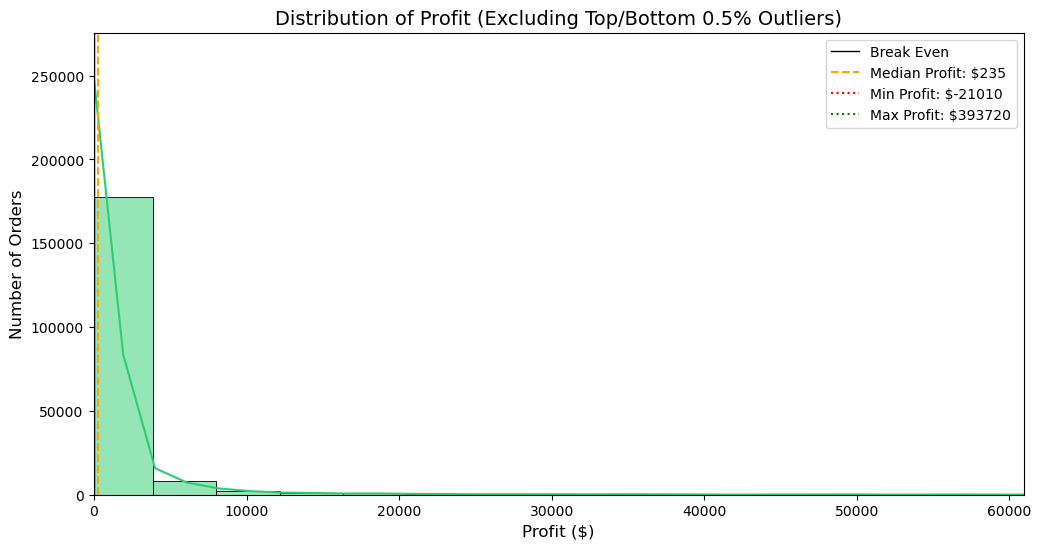

,Profit Type,Value (Millions)
0,Minimum Profit,$-0.02 M
1,Maximum Profit,$0.39 M


In [76]:
# 1. Define the distribution
# This removes the extreme 0.5% on both ends to focus where 99% of orders lie
lower_limit = df_merged['profit'].quantile(0.005)
upper_limit = df_merged['profit'].quantile(0.995)

plt.figure(figsize=(12, 6))

# 2. Create the plot with a focused x-axis

ax=sns.histplot(x='profit', data=df_merged, kde=True, bins=100, color='#2ecc71')

# 3. Apply the 'Zoom'
plt.xlim(lower_limit, upper_limit)

# 4. Add context lines
plt.axvline(0, color='black', linestyle='-', linewidth=1, label='Break Even')
plt.axvline(df_merged['profit'].median(), color='orange', linestyle='--', label=f'Median Profit: ${df_merged["profit"].median():.0f}')
plt.axvline(df_merged['profit'].min(),color='red',linestyle=':', label=f'Min Profit: ${df_merged['profit'].min():.0f}')
plt.axvline(df_merged['profit'].max(),color='green',linestyle=':', label=f'Max Profit: ${df_merged['profit'].max():.0f}')

plt.title('Distribution of Profit (Excluding Top/Bottom 0.5% Outliers)', fontsize=14)
plt.xlabel('Profit ($)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.legend()

plt.show()

min_val = df_merged['profit'].min()
max_val = df_merged['profit'].max()

# Create the data dictionary using numeric values
data = {
    'Profit Type': ['Minimum Profit', 'Maximum Profit'],
    'Value (Millions)': [min_val / 1e6, max_val / 1e6]
}

profit_df = pd.DataFrame(data)

# Style the dataframe
styled_profit_df = (profit_df.style.format({'Value (Millions)': '${:,.2f} M'})
    .applymap(lambda x: 'color: red' if x < 0 else 'color: green', subset=['Value (Millions)']))

display(styled_profit_df)

In [109]:
sale_with_loss = df_merged[df_merged['profit'] < 0]['profit'].sum()
sale_with_profit = df_merged[df_merged['profit'] >= 0]['profit'].sum()
overall_profit= sale_with_profit + sale_with_loss


In [110]:
data = {
    'Metric': ['Sales with Loss', 'Sales with Profit', 'Overall Profit'],
    'Value (Millions)': [sale_with_loss/1e6, sale_with_profit/1e6, overall_profit/1e6]
}
summary_df = pd.DataFrame(data)

# Apply Styling
styled_df = (summary_df.style.format({'Value (Millions)': '${:,.2f} M'}) \
    .applymap(lambda x: 'color: red' if x < 0 else 'color: green', subset=['Value (Millions)']))

display(styled_df)

,Metric,Value (Millions)
0,Sales with Loss,$-0.51 M
1,Sales with Profit,$357.17 M
2,Overall Profit,$356.66 M


## Time Series Analysis / Trends with time



In [80]:
## Creating a dataframe for monthly sales
monthly_sales = df_merged.groupby('order_month').agg({
    'revenue': 'sum',
    'quantity': 'sum'
}).reset_index()

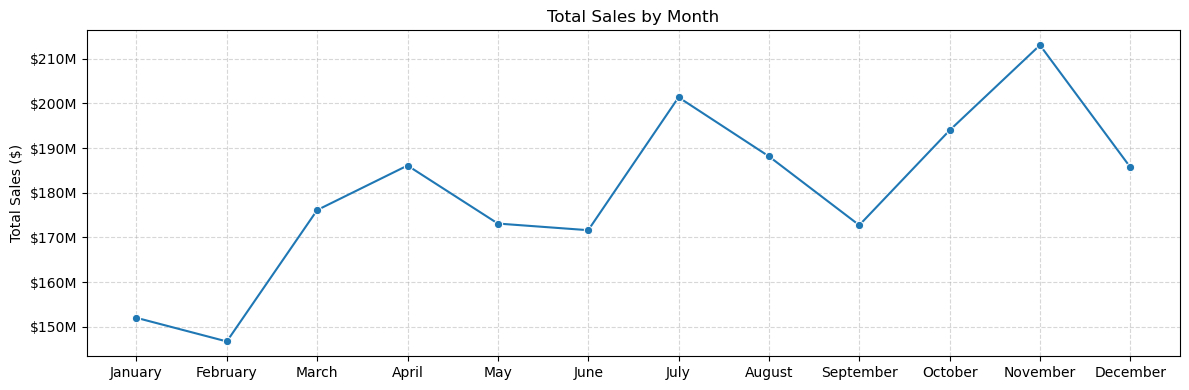

In [81]:
### Plotting line chart for sales by month
monthly_sales['sales_millions'] = monthly_sales['revenue'] /1e6
plt.figure(figsize=(12, 4))
ax=sns.lineplot(x='order_month', y='sales_millions', data=monthly_sales, marker='o')
plt.title('Total Sales by Month')
plt.xlabel('')
plt.ylabel('Total Sales ($)')
plt.grid(True,linestyle='--',alpha=0.5)
plt.xticks(
           ticks=monthly_sales['order_month'],
    labels=[calendar.month_name[i] for i in monthly_sales['order_month']])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}M'))
plt.tight_layout()
plt.show()



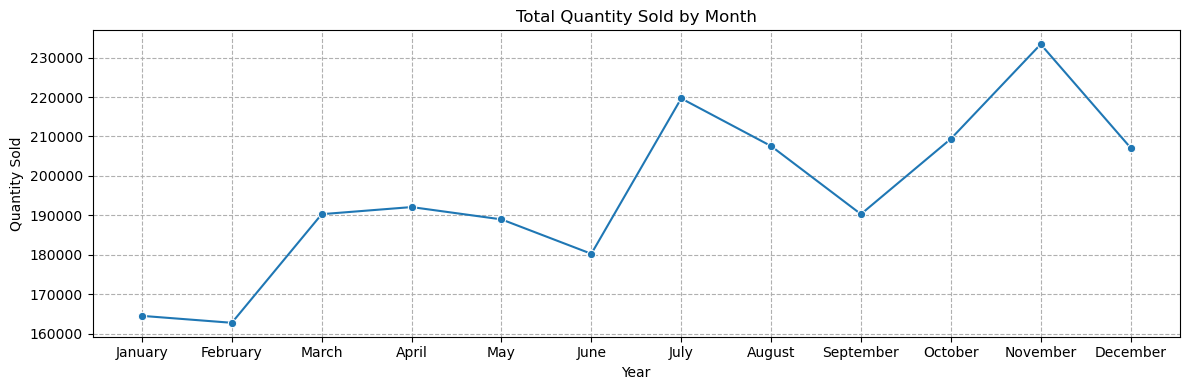

In [82]:
### Plotting line chart for quantity sold by month
plt.figure(figsize=(12, 4))
sns.lineplot(x='order_month', y='quantity', data=monthly_sales, marker='o')
plt.title('Total Quantity Sold by Month')
plt.xlabel('Year')
plt.ylabel('Quantity Sold')
plt.grid(True,linestyle='--')
plt.xticks(ticks=monthly_sales['order_month'],
    labels=[calendar.month_name[i] for i in monthly_sales['order_month']])
plt.tight_layout()
plt.show()


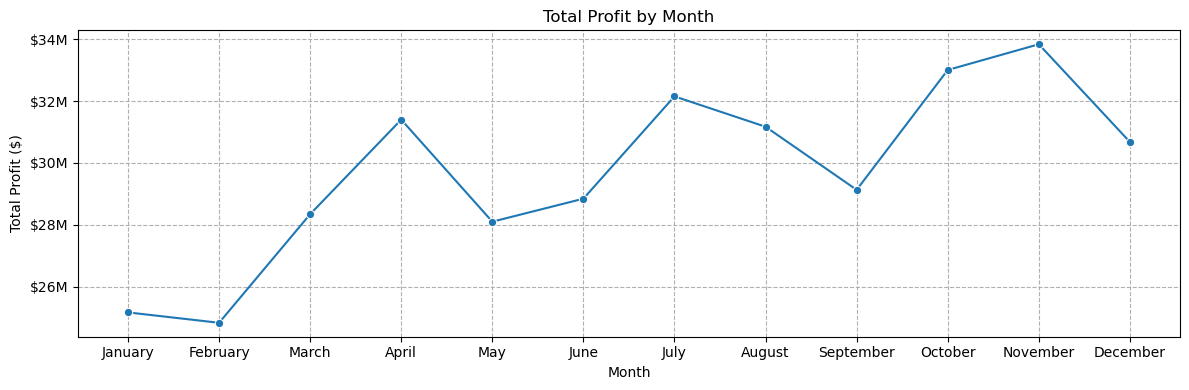

In [83]:
### Plotting line chart for profit month
monthly_profit = df_merged.groupby('order_month')['profit'].sum().reset_index()
monthly_profit['profit_millions'] = monthly_profit['profit'] / 1e6
plt.figure(figsize=(12, 4))
ax = sns.lineplot(x='order_month', y='profit_millions', data=monthly_profit, marker='o')
plt.title('Total Profit by Month')
plt.xlabel('Month')
plt.ylabel('Total Profit ($)')
plt.grid(True,linestyle='--')
plt.xticks(
    ticks=monthly_profit['order_month'],
    labels=[calendar.month_name[i] for i in monthly_profit['order_month']]
)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}M'))
plt.tight_layout()
plt.show()

#### Observations:
- Sales and profit are increasing 

In [84]:
monthly_sales = df_merged.groupby('order_month')['revenue'].sum().reset_index()
monthly_sales.columns = ['month', 'monthly_revenue']
monthly_sales['MoM_Growth_%'] = monthly_sales['monthly_revenue'].pct_change() * 100
monthly_sales['MoM_Growth_%'] = monthly_sales['MoM_Growth_%'].fillna(0)

colormap=sns.light_palette('Green',as_cmap=True)
(monthly_sales[['month','monthly_revenue','MoM_Growth_%']].set_index('month').style.background_gradient(subset=['monthly_revenue','MoM_Growth_%'],cmap=colormap)
 .format({
        'monthly_revenue': '${:,.2f}M', 
        'MoM_Growth_%': '{:,.2f}%'
    }))

,monthly_revenue,MoM_Growth_%
month,,
1,"$152,021,243.58M",0.00%
2,"$146,732,882.39M",-3.48%
3,"$176,126,612.01M",20.03%
4,"$186,086,602.70M",5.66%
5,"$173,108,216.49M",-6.97%
6,"$171,624,375.14M",-0.86%
7,"$201,347,728.14M",17.32%
8,"$188,141,135.94M",-6.56%
9,"$172,745,369.41M",-8.18%


In [85]:
## Creating separate dataframes for plotting
all_customers = df_merged.groupby(['customer_id', 'company_name']).agg({
    'total_amount': 'sum',
    'quantity': 'sum'
})
top_10_customers_amt=df_merged.groupby('company_name')['revenue'].sum().reset_index()
top_10_customers_amt=top_10_customers_amt.sort_values('revenue',ascending=False).head(10)
top_10_customers_amt['total_amount_millions']=top_10_customers_amt['revenue']/1e6
top_10_customers_amt = top_10_customers_amt.reset_index()
top_10_customers_qty=all_customers.sort_values('quantity',ascending=False).head(10)
top_10_customers_qty = top_10_customers_qty.reset_index()
top_10_customers_qty['quantity_k']=top_10_customers_qty['quantity']/1e3

[None, None, None, None, None, None, None, None, None, None]

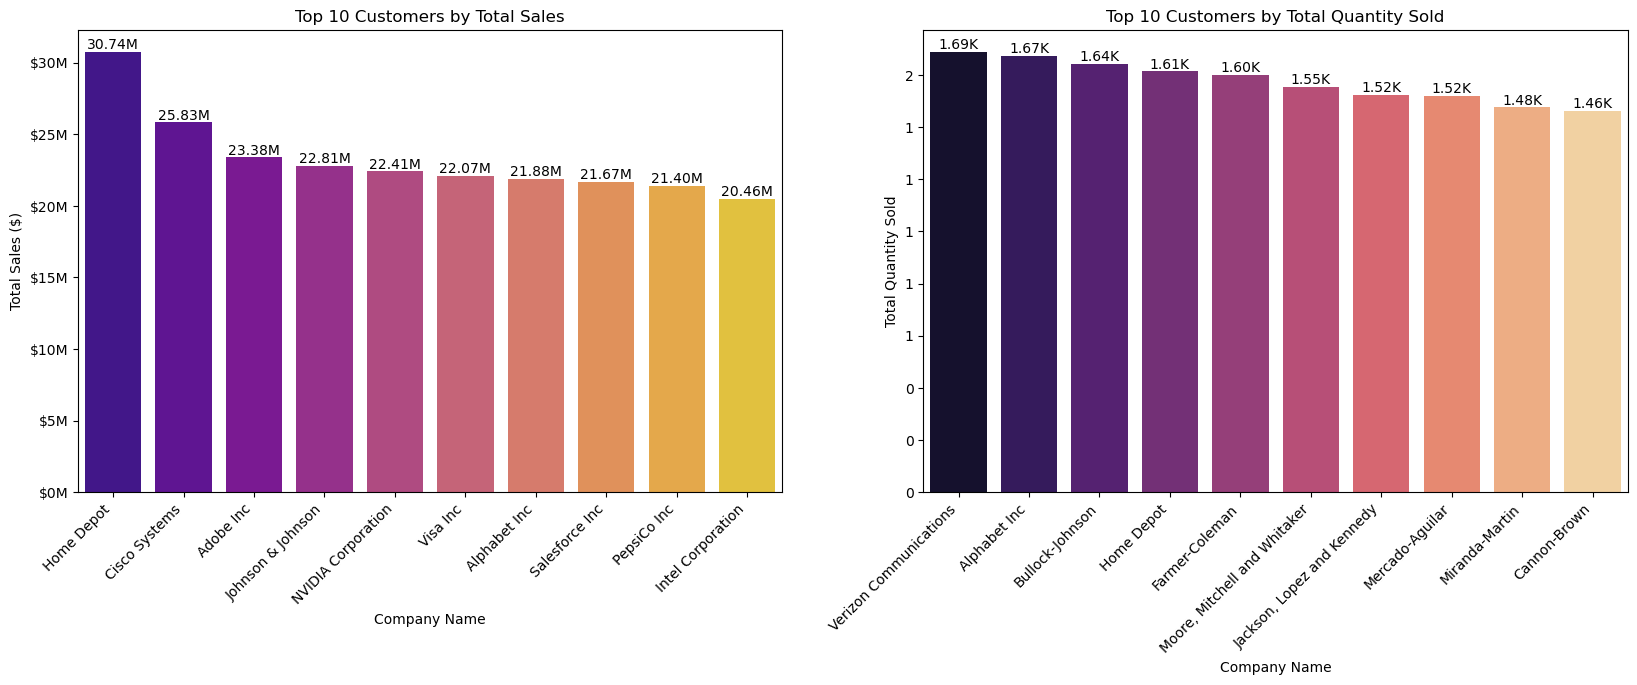

In [86]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))

# Plot 1: Top 10 Customers by Sales
sns.barplot(x='company_name', y='total_amount_millions',data=top_10_customers_amt, palette='plasma', legend=False,ax=ax1,errorbar=None)
ax1.set_title('Top 10 Customers by Total Sales')
ax1.set_xlabel('Company Name')
ax1.set_ylabel('Total Sales ($)')
ax1.tick_params(axis='x', rotation=45)
for container in ax1.containers:
  ax1.bar_label(container,fmt='%.2fM')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}M'))
plt.setp(ax1.get_xticklabels(), ha='right')


# Plot 1: Top 10 Customers by Sales
sns.barplot(x='company_name', y='quantity_k', hue='company_name', data=top_10_customers_qty, palette='magma', legend=False,ax=ax2)
ax2.set_title('Top 10 Customers by Total Quantity Sold')
ax2.set_xlabel('Company Name')
ax2.set_ylabel('Total Quantity Sold')
ax2.tick_params(axis='x', rotation=45)
for container in ax2.containers:
  ax2.bar_label(container,fmt='%.2fK')

ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.setp(ax2.get_xticklabels(), ha='right')

#### Observations: 
- Home Depot is giving us most business with `30.74 Million` in sales
- Verizon Communications is giving us most orders with  `1.69K` in orders 

In [88]:
sales_by_state=df_merged.groupby('state').agg({
    'revenue':'sum',
    'quantity':'sum'
}).reset_index()
state_sales_order=sales_by_state.sort_values(by='revenue')['state']
state_quantity_order=sales_by_state.sort_values(by='quantity')['state']
sales_by_state['total_amount_millions']=sales_by_state['revenue']/1e6
sales_by_state['quantity_k']=sales_by_state['quantity']/1e3

In [89]:
# 1. Calculating Volume VS Revenue performance
state_perf = sales_by_state[['state', 'revenue', 'quantity']].copy()

state_perf['revenue_millions'] = state_perf['revenue'] / 1e6
state_perf['quantity_thousands'] = state_perf['quantity'] / 1e3

# 3. Sort by Revenue
state_perf = state_perf.sort_values('revenue', ascending=False).head(10).reset_index()

In [90]:
colormap=sns.light_palette('blue',as_cmap=True)
(state_perf[['state','revenue_millions','quantity_thousands']].style.background_gradient(cmap=colormap,subset=['revenue_millions','quantity_thousands'])
.format({'revenue_millions': '{:,.2f}M', 'quantity_thousands': '{:,.2f}K'})
.set_caption("State sales performance: REVENUE VS VOLUME"))

,state,revenue_millions,quantity_thousands
0,New York (NY),205.21M,224.63K
1,Pennsylvania (PA),201.33M,213.32K
2,North Carolina (NC),196.42M,203.66K
3,Washington (WA),195.08M,199.90K
4,California (CA),192.53M,216.98K
5,Florida (FL),191.17M,212.83K
6,Georgia (GA),185.90M,211.46K
7,Texas (TX),185.28M,203.05K
8,Massachusetts (MA),174.08M,193.57K
9,Illinois (IL),160.34M,177.20K


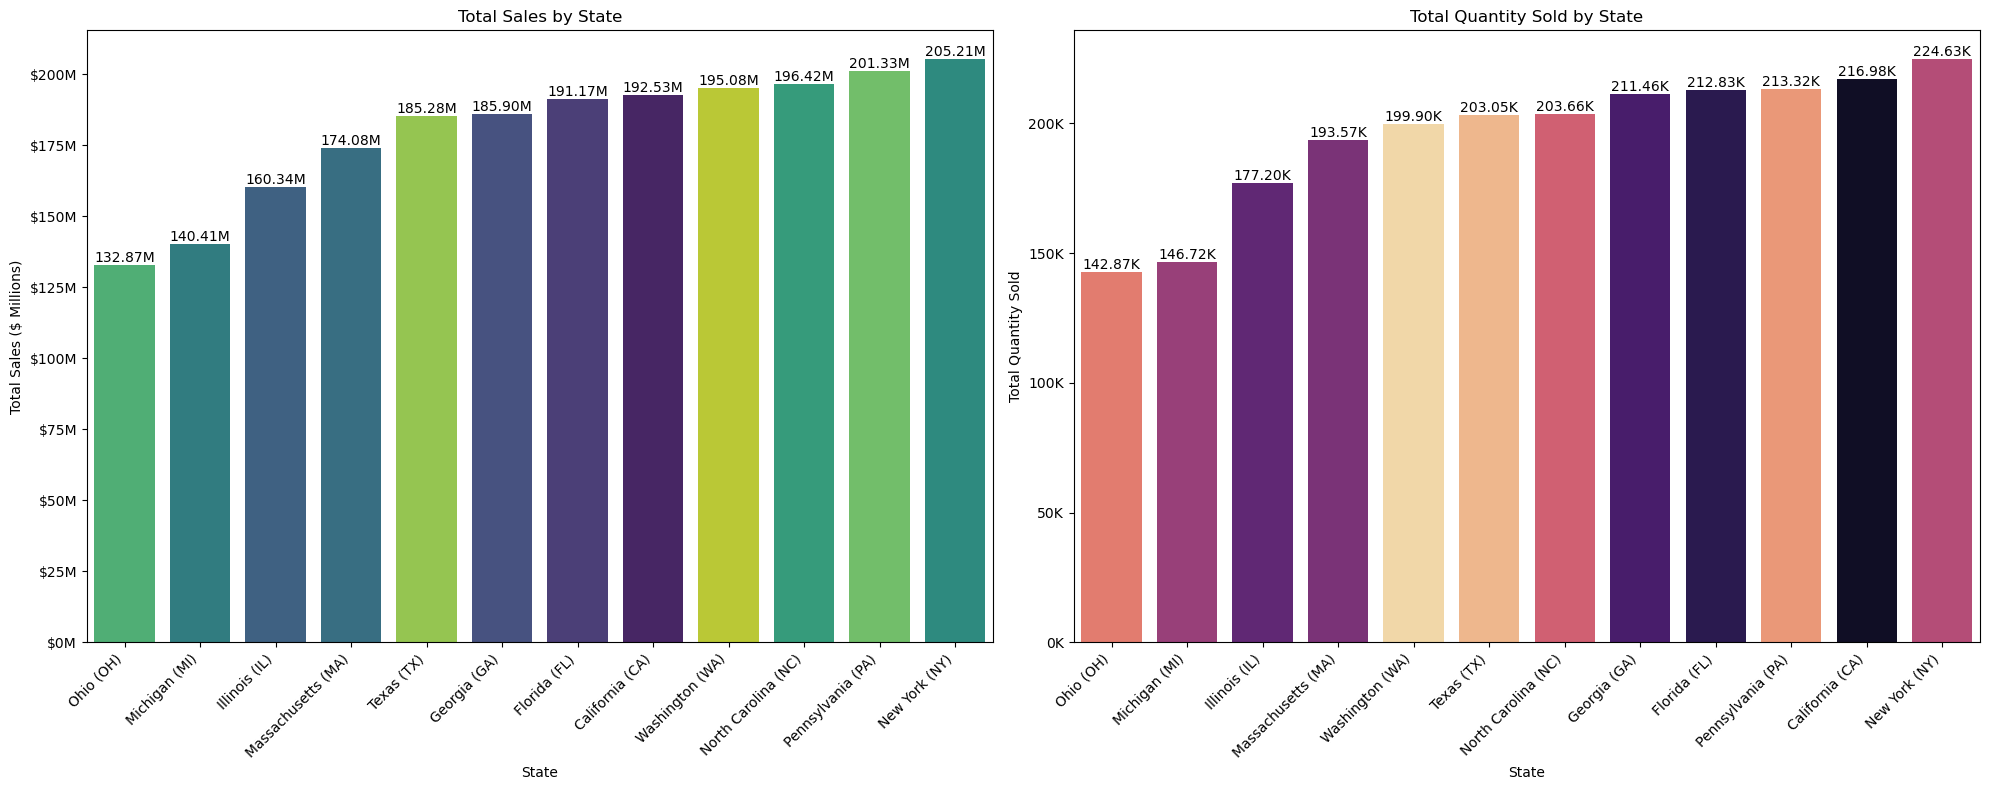

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Most Sale by State
sns.barplot(x='state', y='total_amount_millions', hue='state', data=sales_by_state, palette='viridis', legend=False,order=state_sales_order,ax=ax1)
ax1.set_title('Total Sales by State')
ax1.set_xlabel('State')
ax1.set_ylabel('Total Sales ($ Millions)')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}M'))
ax1.tick_params(axis='x', rotation=45)
plt.setp(ax1.get_xticklabels(), ha='right')
for container in ax1.containers:
  ax1.bar_label(container,fmt='%.2fM')


# Plot 2: Most Quantity Sold by state
sns.barplot(x='state', y='quantity_k', hue='state', data=sales_by_state, palette='magma', legend=False,order=state_quantity_order,ax=ax2)
ax2.set_title('Total Quantity Sold by State')
ax2.set_xlabel('State')
ax2.set_ylabel('Total Quantity Sold')
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}K')) 
ax2.tick_params(axis='x', rotation=45)
for container in ax2.containers:
  ax2.bar_label(container,fmt='%.2fK')
plt.setp(ax2.get_xticklabels(), ha='right')
plt.tight_layout()
plt.show()

### Observations : 
- Newyork bring most business
- Ohio and Michigan are our least performing states and needs immediate attention

In [92]:
# top 5 employees
all_employees = df_merged.groupby(['employee_id', 'employee_name']).agg({
    'revenue': 'sum',
    'quantity': 'sum'
}).reset_index()

top_5_emp_amount=all_employees.sort_values('revenue',ascending=False).reset_index().head(5)
top_5_emp_amount['total_amount_millions']=top_5_emp_amount['revenue']/1e6

top_5_emp_qty=all_employees.sort_values('quantity',ascending=False).reset_index().head(5)
top_5_emp_qty['quantity_k']=top_5_emp_qty['quantity']/1e3

Text(0, 0.5, 'Total quantity sold')

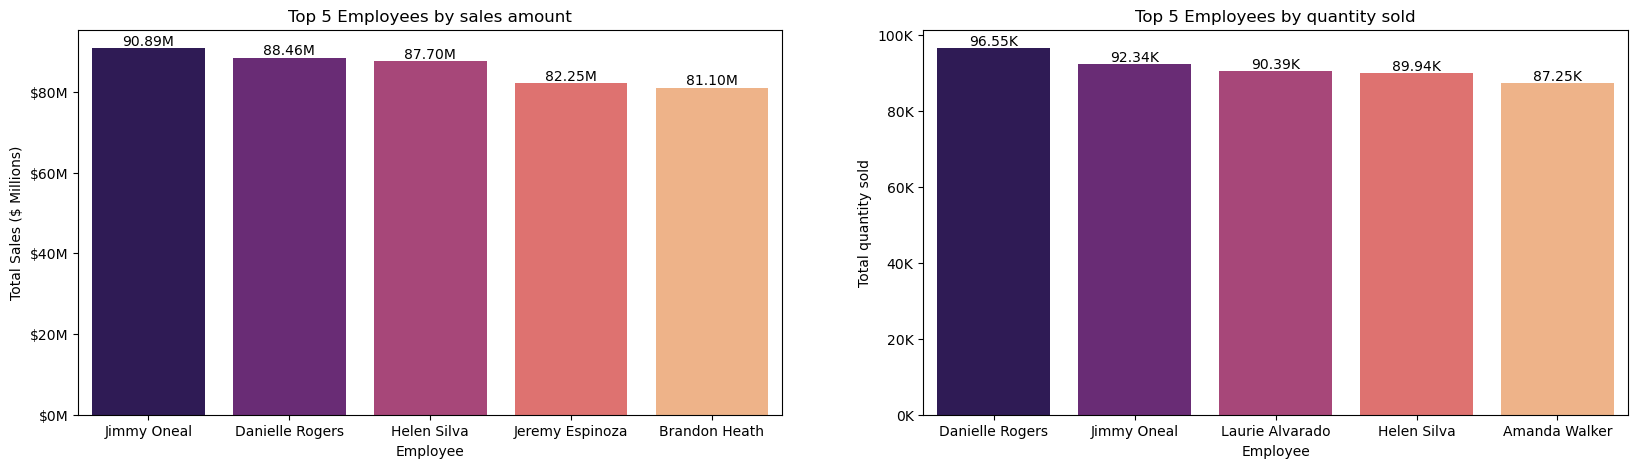

In [93]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 5))
# Plot 1: Top Employees by sales amount
sns.barplot(x='employee_name',y='total_amount_millions',data=top_5_emp_amount,palette='magma',ax=ax1)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}M'))
for container in ax1.containers:
  ax1.bar_label(container,fmt='%.2fM')
ax1.set_title('Top 5 Employees by sales amount')
ax1.set_xlabel('Employee')
ax1.set_ylabel('Total Sales ($ Millions)')

##Plot 2: Top 5 Employees by sale quantity

sns.barplot(x='employee_name',y='quantity_k',data=top_5_emp_qty,palette='magma',ax=ax2)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}K'))
for container in ax2.containers:
  ax2.bar_label(container,fmt='%.2fK')
ax2.set_title('Top 5 Employees by quantity sold')
ax2.set_xlabel('Employee')
ax2.set_ylabel('Total quantity sold')

### Observations : 
- All of our employees are performing well
- Jeremy have sold less quantity but managed to get good sales amount

In [94]:
## Creating Separate dataframe for top 10 suppliers
all_suppliers = df_merged.groupby(['supplier_id']).agg({
    'revenue': 'sum',
    'quantity': 'sum'
}).reset_index()

top_10_suppliers_amt=all_suppliers.sort_values('revenue', ascending=False).head(10).reset_index()
top_10_suppliers_amt['total_amount_millions']=top_10_suppliers_amt['revenue']/1e6
top_10_suppliers_qty=all_suppliers.sort_values('quantity', ascending=False).head(10).reset_index()
top_10_suppliers_qty['quantity_k']=top_10_suppliers_qty['quantity']/1e3

[None, None, None, None, None, None, None, None, None, None]

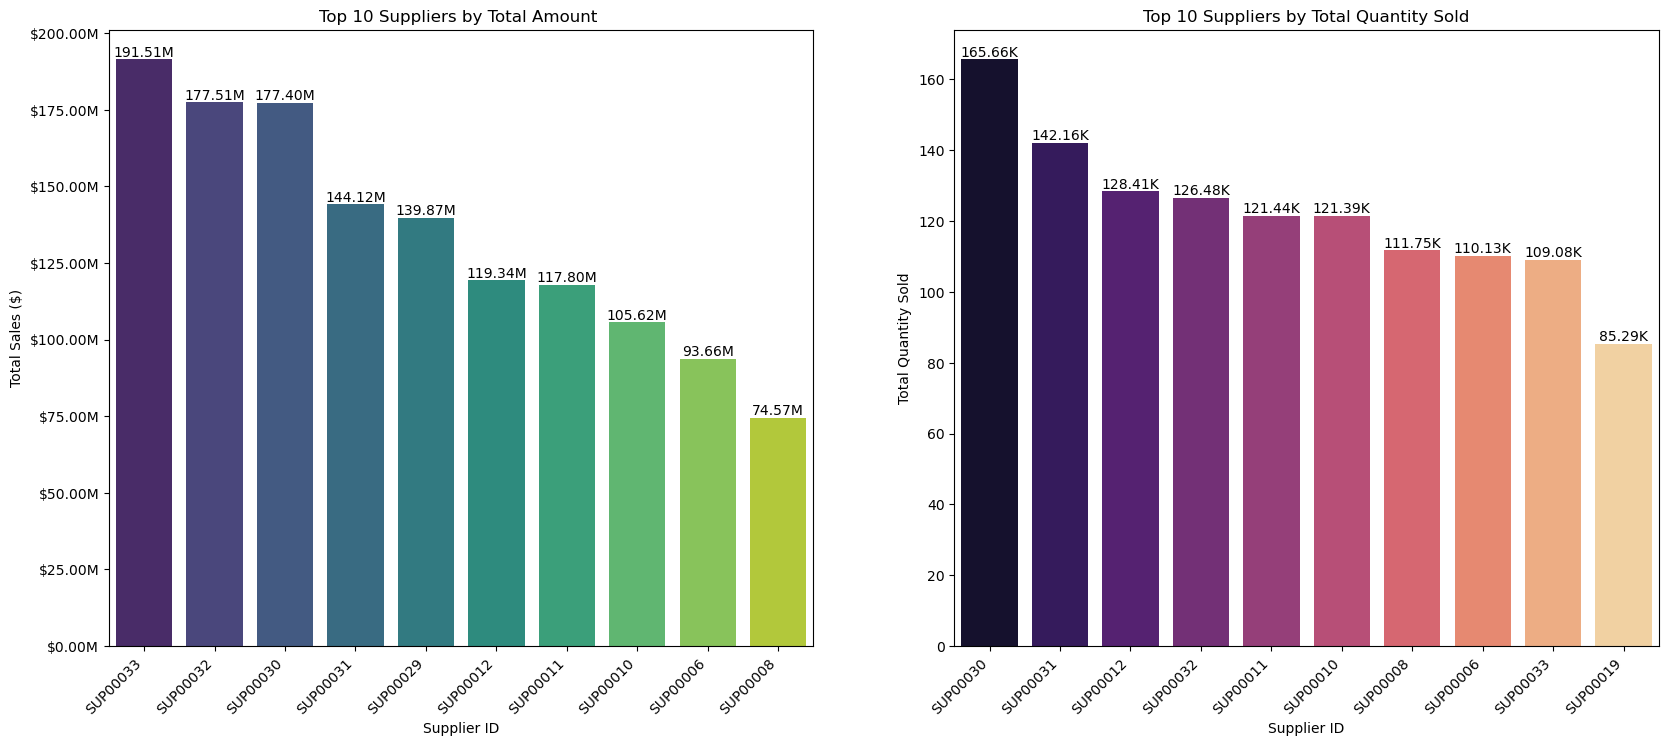

In [95]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))

# Plot 1: Top Suppliers by Sales
sns.barplot(x='supplier_id', y='total_amount_millions', data=top_10_suppliers_amt, palette='viridis', legend=False,ax=ax1)
plt.title('Top 10 Suppliers by Total Sales')
ax1.set_xlabel('Supplier ID')
ax1.set_ylabel('Total Sales ($)')
ax1.set_title('Top 10 Suppliers by Total Amount ')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:.2f}M'))
ax1.tick_params(axis='x', rotation=45)
plt.setp(ax1.get_xticklabels(), ha='right')
for container in ax1.containers:
  ax1.bar_label(container,fmt='%.2fM')

# Plot 2: Top Suppliers by Quantity sold
sns.barplot(x='supplier_id', y='quantity_k', data=top_10_suppliers_qty, palette='magma', legend=False,ax=ax2)
ax2.set_title('Top 10 Suppliers by Total Quantity Sold')
ax2.set_xlabel('Supplier ID')
ax2.set_ylabel('Total Quantity Sold')
ax2.tick_params(axis='x', rotation=45)
for container in ax2.containers:
  ax2.bar_label(container,fmt='%.2fK')
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.setp(ax2.get_xticklabels(), ha='right')

### Observations 
- We are buying least from Supplier 8 and 6 

In [51]:
#  Creating Separate dataframe for 10 products
all_products = df_merged.groupby(['product_id', 'product_name']).agg({
    'total_amount': 'sum',
    'quantity': 'sum'
}).reset_index()

top_10_product_amt=all_products.sort_values(by='total_amount', ascending=False).head(10)
top_10_product_amt['total_amount_millions']=top_10_product_amt['total_amount']/1e6

top_10_product_qty=all_products.sort_values(by='quantity', ascending=False).head(10)
top_10_product_qty['quantity_k']=top_10_product_qty['quantity']/1e3

[None, None, None, None, None, None, None, None, None, None]

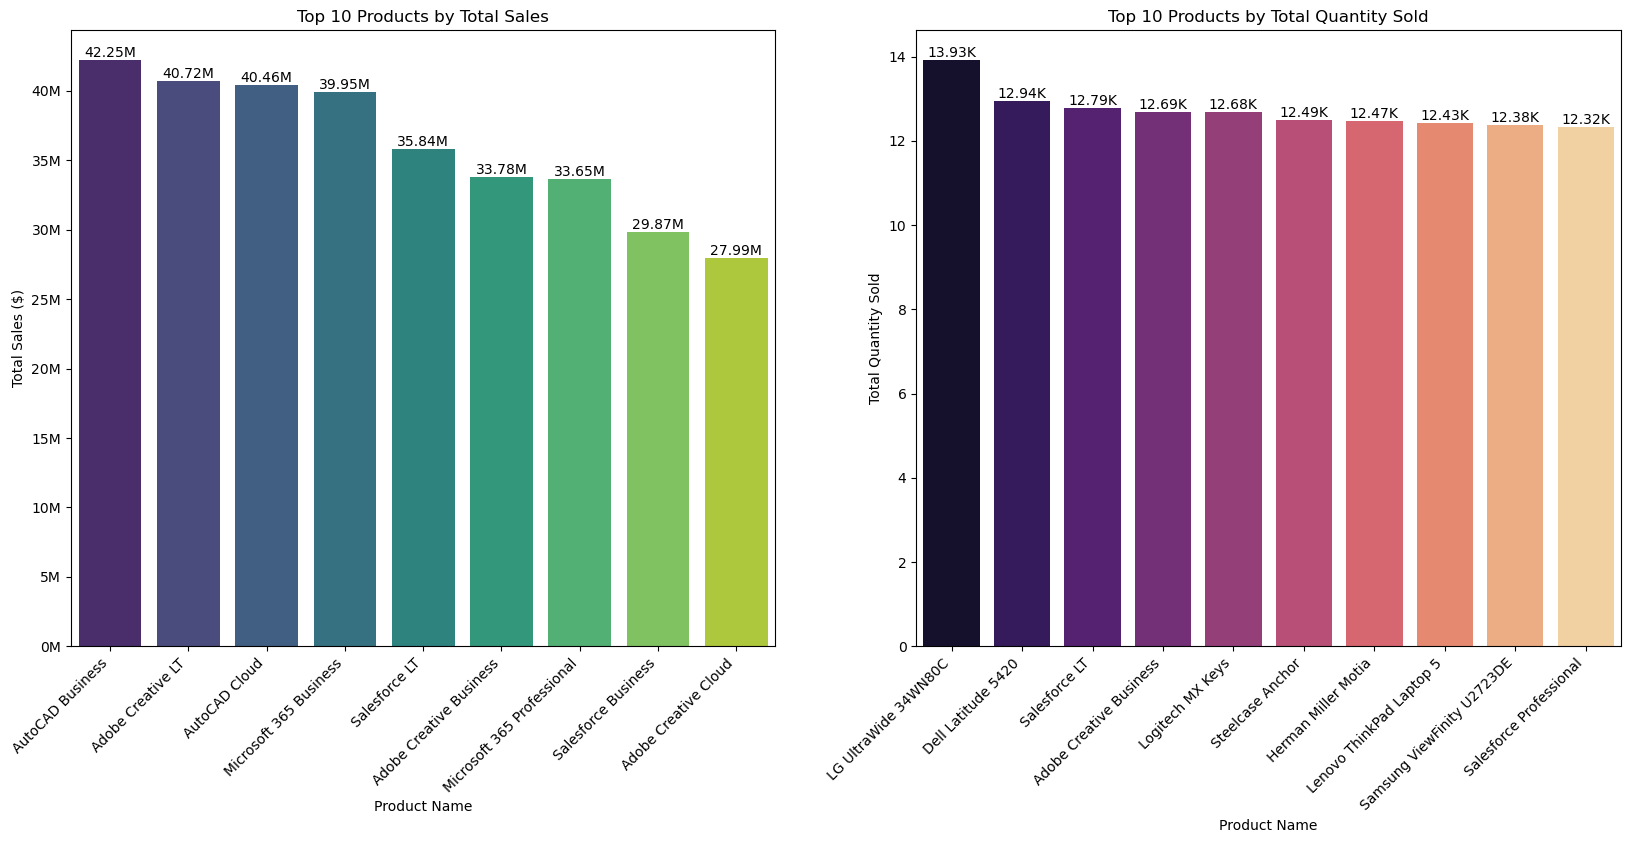

In [52]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))

# Plot 1: Top Products by Amount
sns.barplot(x='product_name', y='total_amount_millions', data=top_10_product_amt, palette='viridis', legend=False,ax=ax1,errorbar=None)
ax1.set_title('Top 10 Products by Total Sales')
ax1.set_ylabel('Total Sales ($)')
ax1.set_xlabel('Product Name')
for container in ax1.containers:
  ax1.bar_label(container,fmt='%.2fM')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}M'))
ax1.tick_params(axis='x', rotation=45)
plt.setp(ax1.get_xticklabels(), ha='right')

# Plot 2: Top Products by Quantity sold
sns.barplot(x='product_name', y='quantity_k', data=top_10_product_qty, palette='magma', legend=False,ax=ax2,errorbar=None)
ax2.set_title('Top 10 Products by Total Quantity Sold')
ax2.set_xlabel('Product Name')
ax2.set_ylabel('Total Quantity Sold')
for container in ax2.containers:
  ax2.bar_label(container,fmt='%.2fK')
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax2.tick_params(axis='x', rotation=45)
plt.setp(ax2.get_xticklabels(), ha='right')


## Observations:
- AutoCAD Business is driving the most revenue with over $ 41 million in sales.
- Lg UltraWide 34WN80C is our most sold product

### Geographic and Demographic Sales Analysis

Analyze sales performance by `region`, `state`, `industry`, and `segment` 


In [97]:
## Creating a dataframe for sales per region
sales_by_region = df_merged.groupby('region').agg({
    'revenue': 'sum',
    'quantity': 'sum'
}).reset_index()

Text(0.5, 1.0, 'Proportion of Total Quantity Sold by Region')

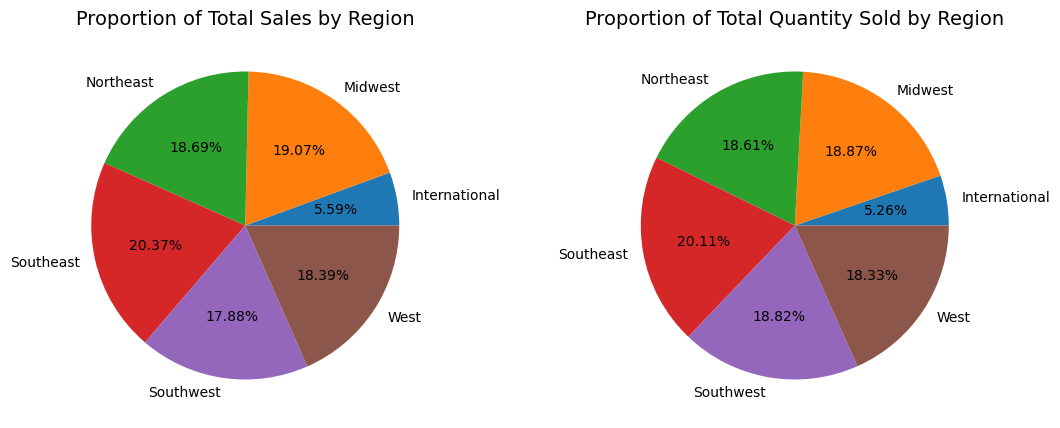

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
# Plot 1: Sales By Region
axes[0].set_title('Proportion of Total Sales by Region', fontsize=14)
axes[0].pie(x='revenue',labels='region',data=sales_by_region,autopct='%.2f%%')

# Plot 2: Quantity Sold By Region
axes[1].pie(x='quantity',labels='region',data=sales_by_region,autopct='%.2f%%')
axes[1].set_title('Proportion of Total Quantity Sold by Region', fontsize=14)


## Observations:
- We are performing well

In [99]:
## Creating Separate dataframe for industries
sales_by_industry = df_merged.groupby('industry').agg({
    'revenue': 'sum',
    'quantity': 'sum'
}).reset_index()


sales_by_industry['total_amount_millions']=sales_by_industry['revenue']/1e6
sales_by_industry['quantity_k']=sales_by_industry['quantity']/1e3
industry_amt_order=sales_by_industry.sort_values('revenue',ascending=False).reset_index()
industry_qty_order=sales_by_industry.sort_values('quantity',ascending=False).reset_index()

Sales performance by industry visualized.


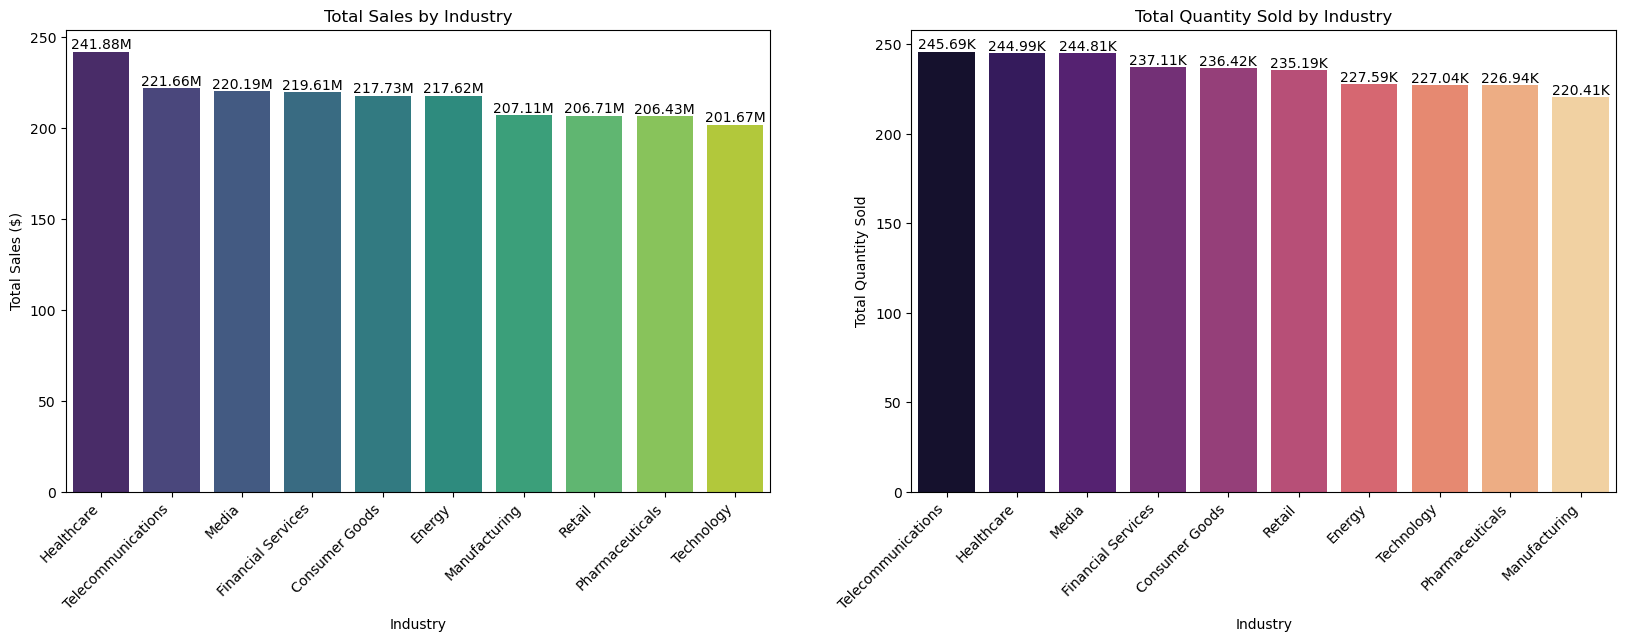

In [100]:

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,6))

# Plot 1: Most Sale by Industry
sns.barplot(x='industry', y='total_amount_millions', data=industry_amt_order, palette='viridis', legend=False,ax=ax1)
ax1.set_title('Total Sales by Industry')
ax1.set_xlabel('Industry')
ax1.set_ylabel('Total Sales ($)')
for container in ax1.containers:
  ax1.bar_label(container,fmt='%.2fM')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.tick_params(axis='x', rotation=45)
plt.setp(ax1.get_xticklabels(), ha='right')


# Plot 2: Most Quantity sold by industry
sns.barplot(x='industry', y='quantity_k',  data=industry_qty_order, palette='magma', legend=False,ax=ax2)
ax2.set_title('Total Quantity Sold by Industry')
ax2.set_xlabel('Industry')
ax2.set_ylabel('Total Quantity Sold')
for container in ax2.containers:
  ax2.bar_label(container,fmt='%.2fK')
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax2.tick_params(axis='x', rotation=45)
plt.setp(ax2.get_xticklabels(), ha='right')


print("Sales performance by industry visualized.")

## Observations:
- Telecommunicatons and Healthcare industry bring us the best business
- Business from Manufacturing industry can be improved

In [101]:
# Creating separate dataframe for different segments
sales_by_segment = df_merged.groupby('segment').agg({
    'revenue': 'sum',
    'quantity': 'sum'
}).reset_index()

sales_by_segment['total_amount_millions']=sales_by_segment['revenue']/1e6
sales_by_segment['quantity_K']=sales_by_segment['quantity']/1e3

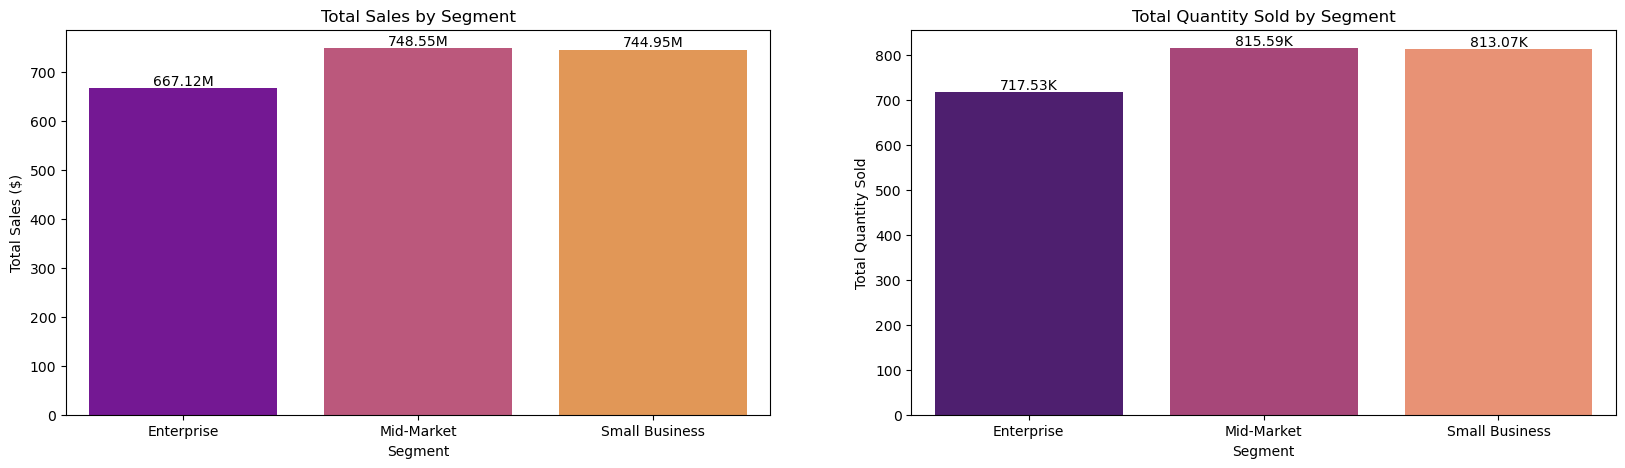

In [102]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))

# Plot 1: Most Sale by Segment
sns.barplot(x='segment', y='total_amount_millions', hue='segment', data=sales_by_segment, palette='plasma', legend=False,ax=ax1)
ax1.set_title('Total Sales by Segment')
ax1.set_xlabel('Segment')
ax1.set_ylabel('Total Sales ($)')
for container in ax1.containers:
  ax1.bar_label(container,fmt='%.2fM')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))



# Plot 2: Most Quantity Sold by Segment
sns.barplot(x='segment', y='quantity_K', hue='segment', data=sales_by_segment, palette='magma', legend=False,ax=ax2)
ax2.set_title('Total Quantity Sold by Segment')
ax2.set_xlabel('Segment')
ax2.set_ylabel('Total Quantity Sold')
for container in ax2.containers:
  ax2.bar_label(container,fmt='%.2fK')
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))



## Order Fulfillment and Status Analysis

Examine the distribution of `order_status` and `payment_method`.

In [59]:
## Creating a separate data frame for order fulfilment distribution
order_status_counts = df_merged['order_status'].value_counts().reset_index()
order_status_counts.columns = ['order_status', 'count']

Text(0.5, 1.0, 'Order fulfilment distribution')

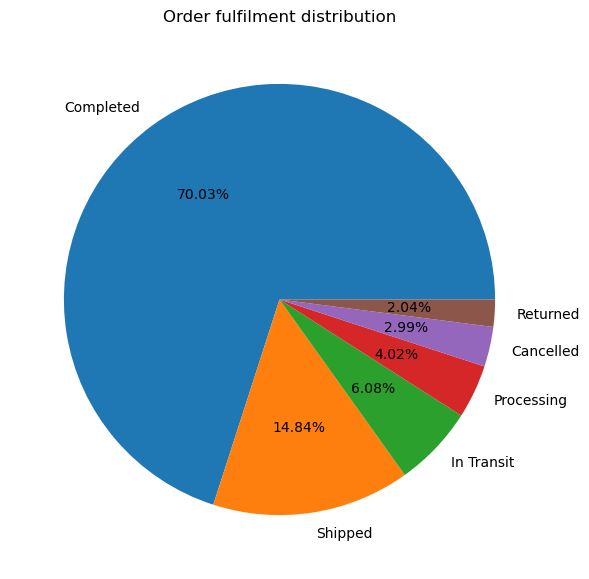

In [60]:
# Plot : Order fulfilment distribution
plt.figure(figsize=(7,7))
plt.pie(x='count',labels='order_status',data=order_status_counts,autopct='%.2f%%')
plt.title('Order fulfilment distribution')

#### Observations:
- Order fulfilment is good only `3%` of orders are cancelled 
- With only `2%` return rate 

Text(0.5, 1.0, 'Payment Method Distribution')

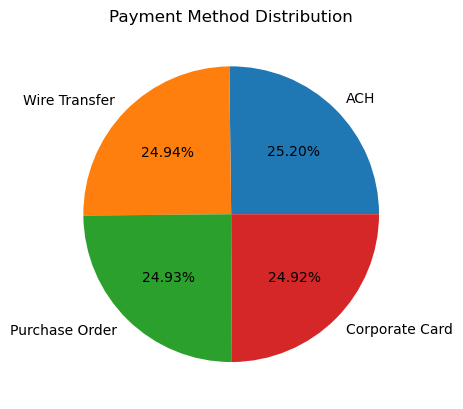

In [103]:
# Creating a separate data frame for pament distribution
payment_method_counts = df_merged['payment_method'].value_counts()
payment_method_counts.columns = ['payment_method', 'count']

# Plot: Payment method distribution
plt.pie(x=payment_method_counts.values,data=payment_method_counts,labels=payment_method_counts.index,autopct='%.2f%%')
plt.title('Payment Method Distribution')


In [114]:
df_merged['processing_time_days'] = (df_merged['ship_date'] - df_merged['order_date']).dt.days
print(f"Average processing time: {df_merged['processing_time_days'].mean():.2f} days")

Average processing time: 3.00 days


In [118]:
df_merged['delivery_time'] = (df_merged['delivery_date'] - df_merged['ship_date']).dt.days
print(f"Average order delivery time : {df_merged['delivery_time'].mean():.2f} days")

Average order delivery time : 5.81 days


In [117]:
df_merged['fulfillment_time'] = (df_merged['delivery_date'] - df_merged['order_date']).dt.days
print(f"Average order fulfillment time: {df_merged['fulfillment_time'].mean():.2f} days")

Average order fulfillment time: 8.82 days


## Impact of Discounts On Sales And Profit



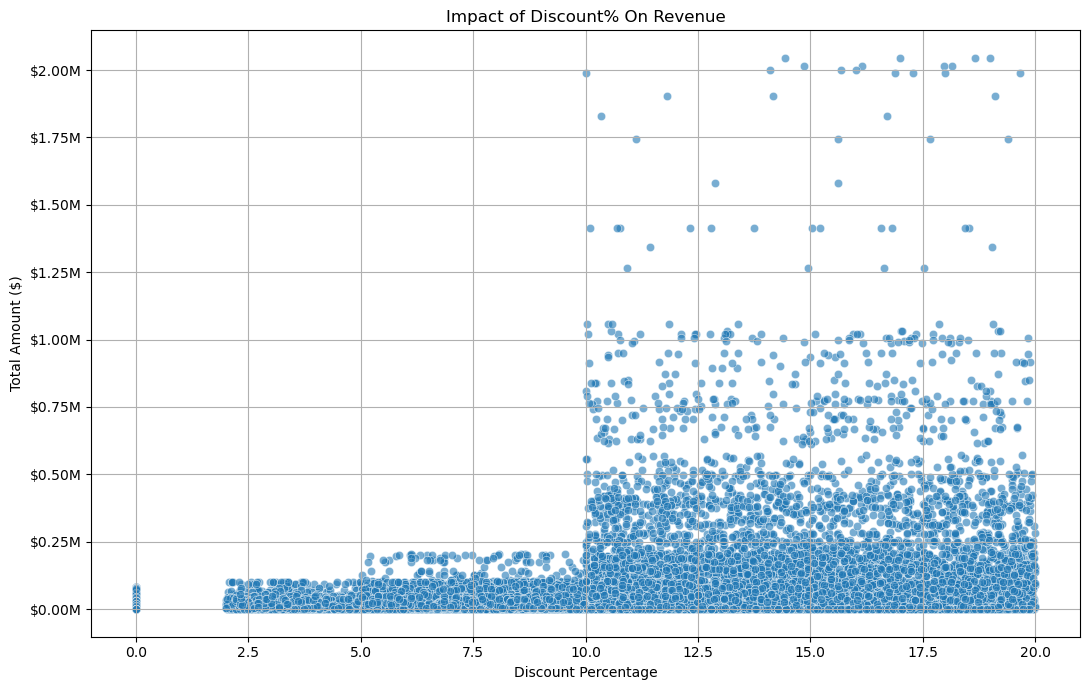

In [104]:
# Plot : Impact of Discount Percentage On Total Amount/ Revenue
plt.figure(figsize=(11, 7))
sns.scatterplot(x='discount_percentage', y='revenue', data=df_merged, alpha=0.6)
plt.title('Impact of Discount% On Revenue')
plt.xlabel('Discount Percentage')
plt.ylabel('Total Amount ($)')
def millions_formatter(x, pos):
    """The function to be used as formatter."""
    return f'${x * 1e-6:1.2f}M'
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.grid(True)
plt.tight_layout()
plt.show()

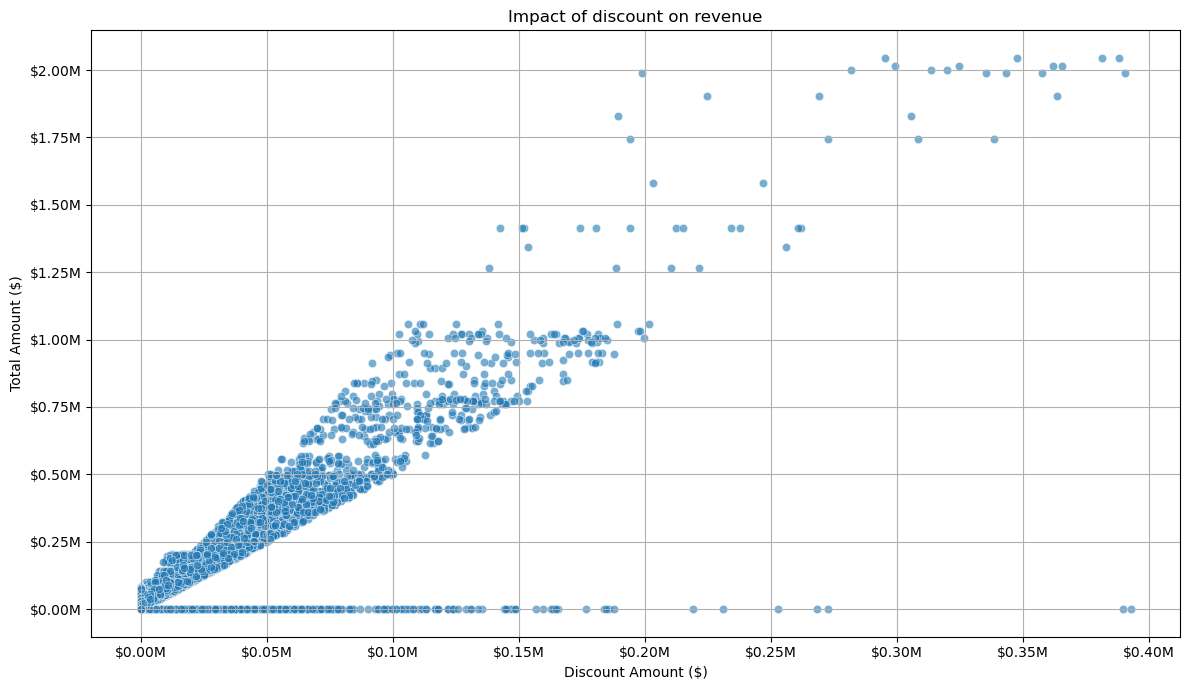

In [105]:
# Plot: Impact of discount on revenue
plt.figure(figsize=(12, 7))
sns.scatterplot(x='discount', y='revenue', data=df_merged, alpha=0.6)
plt.title('Impact of discount on revenue')
plt.xlabel('Discount Amount ($)')
plt.ylabel('Total Amount ($)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.grid(True)
plt.tight_layout()
plt.show()

## Observations :
- Revenue increased as we gave slight discounts

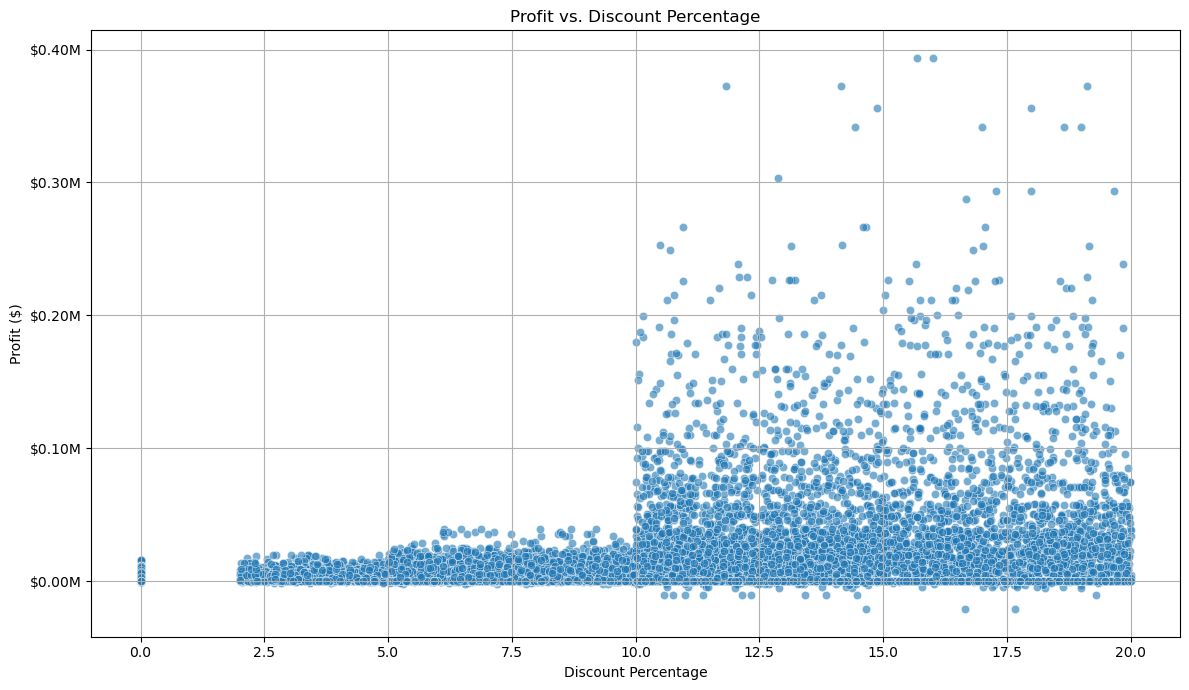

In [106]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='discount_percentage', y='profit', data=df_merged, alpha=0.6)
plt.title('Profit vs. Discount Percentage')
plt.xlabel('Discount Percentage')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.ylabel('Profit ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Observation: 
- We made a significant loss where we didn't gave a discount

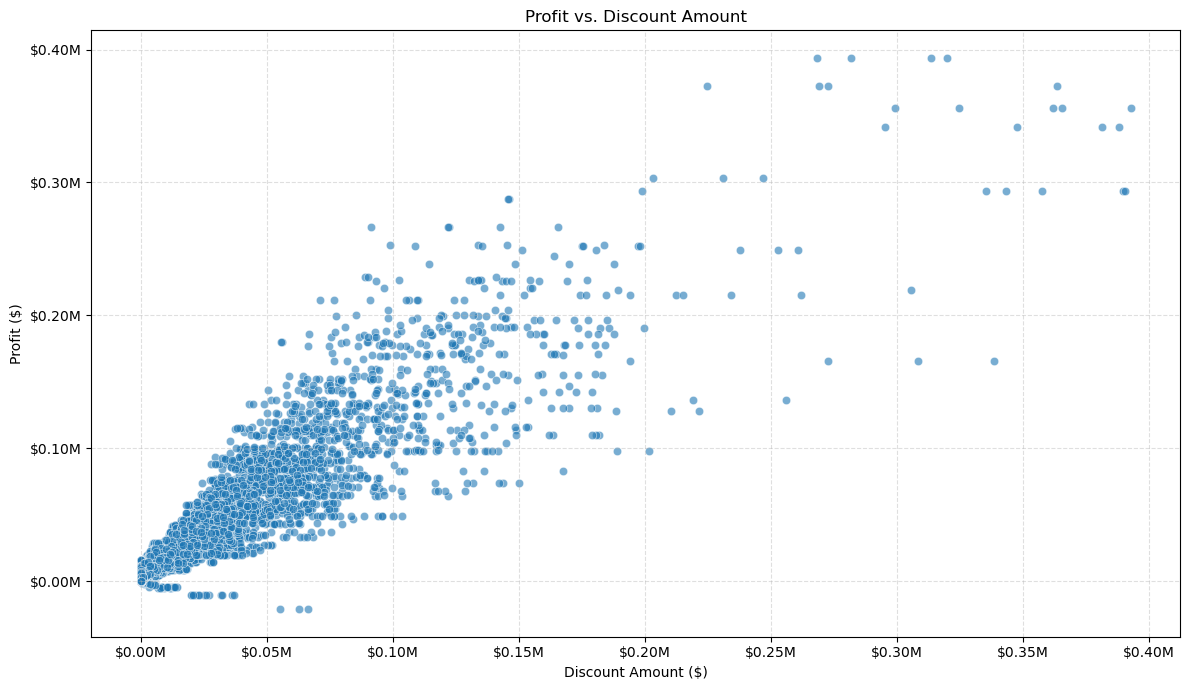

In [67]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='discount', y='profit', data=df_merged, alpha=0.6)
plt.title('Profit vs. Discount Amount')
plt.xlabel('Discount Amount ($)')
plt.ylabel('Profit ($)')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.grid(True,alpha=0.4,linestyle='--')
plt.tight_layout()
plt.show()

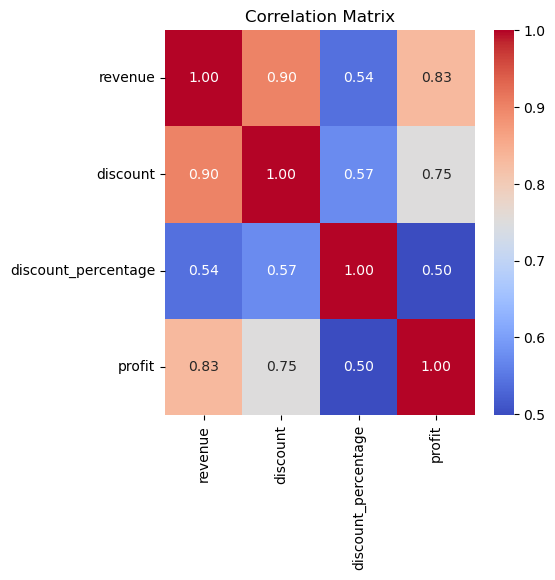

In [107]:
## Creating correlation matrix 
correlation_matrix = df_merged[['revenue','discount','discount_percentage','profit']].corr()
# Plot: Heatmap of the correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()